In [145]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
import matplotlib.pyplot as plt

In [146]:
df = pd.read_csv("S05-hw-dataset.csv")

In [147]:
df.head()

,client_id,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years,default
0,1,25,94074,22,839,0.547339,1,7,0,0,26057,5229,0.080052,19,1,8,0
1,2,58,51884,26,565,0.290882,1,1,0,1,16221,11595,0.428311,15,0,7,0
2,3,53,48656,39,561,0.522340,1,13,0,0,55448,-2947,0.770883,15,4,5,0
3,4,42,81492,30,582,0.709123,2,10,1,1,35188,17727,0.357619,0,2,7,1
4,5,42,94713,8,642,0.793392,3,3,0,0,0,-404,0.414260,17,1,10,1


In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   client_id                       3000 non-null   int64  
 1   age                             3000 non-null   int64  
 2   income                          3000 non-null   int64  
 3   years_employed                  3000 non-null   int64  
 4   credit_score                    3000 non-null   int64  
 5   debt_to_income                  3000 non-null   float64
 6   num_credit_cards                3000 non-null   int64  
 7   num_late_payments               3000 non-null   int64  
 8   has_mortgage                    3000 non-null   int64  
 9   has_car_loan                    3000 non-null   int64  
 10  savings_balance                 3000 non-null   int64  
 11  checking_balance                3000 non-null   int64  
 12  region_risk_score               30

In [149]:
df.describe()

,client_id,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years,default
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1500.500000,45.059667,69658.992000,19.577667,649.285333,0.284065,3.494667,6.869333,0.495000,0.501333,20607.256667,5559.684333,0.400175,9.524667,1.976333,6.968667,0.410333
std,866.169729,14.192883,24742.235182,11.381497,69.955852,0.161112,2.289917,4.291278,0.500058,0.500082,14035.209739,6306.032612,0.204529,5.779030,1.408700,4.349942,0.491976
min,1.000000,21.000000,15000.000000,0.000000,402.000000,0.006147,0.000000,0.000000,0.000000,0.000000,0.000000,-3000.000000,0.001148,0.000000,0.000000,0.000000,0.000000
25%,750.750000,33.000000,52641.750000,10.000000,604.000000,0.157796,1.000000,3.000000,0.000000,0.000000,9612.250000,341.500000,0.239208,5.000000,1.000000,3.000000,0.000000
50%,1500.500000,45.000000,69784.500000,20.000000,647.000000,0.261726,3.000000,7.000000,0.000000,1.000000,20021.000000,5114.500000,0.381992,10.000000,2.000000,7.000000,0.000000
75%,2250.250000,57.000000,85874.250000,29.000000,697.000000,0.388886,6.000000,10.000000,1.000000,1.000000,30101.250000,9906.250000,0.549213,15.000000,3.000000,11.000000,1.000000
max,3000.000000,69.000000,156351.000000,39.000000,850.000000,0.878343,7.000000,14.000000,1.000000,1.000000,75237.000000,29335.000000,0.961733,19.000000,4.000000,14.000000,1.000000


In [150]:
df["default"].value_counts(normalize=True)

default
0    0.589667
1    0.410333
Name: proportion, dtype: float64

В датасете 3000 объектов и 17 признаков, все столбцы полные (пропусков нет). Явных аномалий по диапазонам числовых признаков не видно: возраст 21–69 лет, кредитный скор 402-850, доля долга от дохода от 0.006 до 0.879 выглядит реалистично. Таргет `default` распределён умеренно несбалансированно: около 59% наблюдений относятся к классу 0 (без дефолта) и 41% к классу 1 (дефолт).

In [151]:
# Таргет
y = df["default"]

# Признаки: все столбцы, кроме client_id и default
feature_cols = [col for col in df.columns if col not in ("client_id", "default")]
X = df[feature_cols]

X.head(), y.head()

(   age  income  years_employed  credit_score  debt_to_income  \
 0   25   94074              22           839        0.547339   
 1   58   51884              26           565        0.290882   
 2   53   48656              39           561        0.522340   
 3   42   81492              30           582        0.709123   
 4   42   94713               8           642        0.793392   
 
    num_credit_cards  num_late_payments  has_mortgage  has_car_loan  \
 0                 1                  7             0             0   
 1                 1                  1             0             1   
 2                 1                 13             0             0   
 3                 2                 10             1             1   
 4                 3                  3             0             0   
 
    savings_balance  checking_balance  region_risk_score  \
 0            26057              5229           0.080052   
 1            16221             11595           0.428311   


In [152]:
RANDOM_STATE = 42

# Отделяем тестовую выборку (20% данных)
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    stratify=y, # сохраняем баланс классов
    random_state=RANDOM_STATE,
)


In [153]:
# Бейзлайн-модель
dummy_clf = DummyClassifier(strategy="most_frequent", random_state=RANDOM_STATE)
dummy_clf.fit(X_train, y_train)

,"strategy strategy: {""most_frequent"", ""prior"", ""stratified"", ""uniform"", ""constant""}, default=""prior""Strategy to use to generate predictions.* ""most_frequent"": the `predict` method always returns the most frequent class label in the observed `y` argument passed to `fit`. The `predict_proba` method returns the matching one-hot encoded vector.* ""prior"": the `predict` method always returns the most frequent class label in the observed `y` argument passed to `fit` (like ""most_frequent""). ``predict_proba`` always returns the empirical class distribution of `y` also known as the empirical class prior distribution.* ""stratified"": the `predict_proba` method randomly samples one-hot vectors from a multinomial distribution parametrized by the empirical class prior probabilities. The `predict` method returns the class label which got probability one in the one-hot vector of `predict_proba`. Each sampled row of both methods is therefore independent and identically distributed.* ""uniform"": generates predictions uniformly at random from the list of unique classes observed in `y`, i.e. each class has equal probability.* ""constant"": always predicts a constant label that is provided by the user. This is useful for metrics that evaluate a non-majority class. .. versionchanged:: 0.24 The default value of `strategy` has changed to ""prior"" in version 0.24.",'most_frequent'
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness to generate the predictions when``strategy='stratified'`` or ``strategy='uniform'``.Pass an int for reproducible output across multiple function calls.See :term:`Glossary `.",42
,"constant constant: int or str or array-like of shape (n_outputs,), default=NoneThe explicit constant as predicted by the ""constant"" strategy. Thisparameter is useful only for the ""constant"" strategy.",None


In [154]:
# Предсказания бейзлайна на тесте
y_test_pred_dummy = dummy_clf.predict(X_test)
y_test_proba_dummy = dummy_clf.predict_proba(X_test)[:, 1]

dummy_test_acc = accuracy_score(y_test, y_test_pred_dummy)
dummy_test_roc_auc = roc_auc_score(y_test, y_test_proba_dummy)
dummy_test_acc, dummy_test_roc_auc

(0.59, 0.5)

Бейзлайн‑модель на DummyClassifier показывает на валидации `accuracy` примерно `0.59` и `ROC-AU`C около `0.5`. Такой классификатор фактически всегда выбирает самый частый класс и почти не использует информацию признаков, поэтому его качество близко к случайному угадыванию. Эти значения нужны как простая точка отсчёта: более сложные модели должны давать метрики заметно выше, иначе их использование не имеет смысла.

In [155]:

# 1. Подбор C
C_values = [0.01, 0.1, 1.0, 10.0]

best_C = None
best_roc_auc = -1
best_pipe = None

for C in C_values:
    logreg_pipe = Pipeline([
        ("scaler", StandardScaler()),
        ("logreg", LogisticRegression(
            C=C,
            max_iter=1000,
            random_state=RANDOM_STATE,
        )),
    ])

    logreg_pipe.fit(X_train, y_train)

    y_val_pred = logreg_pipe.predict(X_val)
    y_val_proba = logreg_pipe.predict_proba(X_val)[:, 1]

    acc = accuracy_score(y_val, y_val_pred)
    roc_auc = roc_auc_score(y_val, y_val_proba)

    print(f"C={C:>5}: val accuracy={acc:.4f}, val ROC-AUC={roc_auc:.4f}")

    if roc_auc > best_roc_auc:
        best_roc_auc = roc_auc
        best_C = C
        best_pipe = logreg_pipe

print(f"\nЛучшее C по ROC-AUC на val: {best_C}, ROC-AUC={best_roc_auc:.4f}")

C= 0.01: val accuracy=0.8250, val ROC-AUC=0.8801
C=  0.1: val accuracy=0.8117, val ROC-AUC=0.8797
C=  1.0: val accuracy=0.8133, val ROC-AUC=0.8796
C= 10.0: val accuracy=0.8117, val ROC-AUC=0.8796

Лучшее C по ROC-AUC на val: 0.01, ROC-AUC=0.8801


In [156]:
# 2. Оценка лучшей модели на тесте

y_test_pred = best_pipe.predict(X_test)
y_test_proba = best_pipe.predict_proba(X_test)[:, 1]

test_acc = accuracy_score(y_test, y_test_pred)
test_roc_auc = roc_auc_score(y_test, y_test_proba)

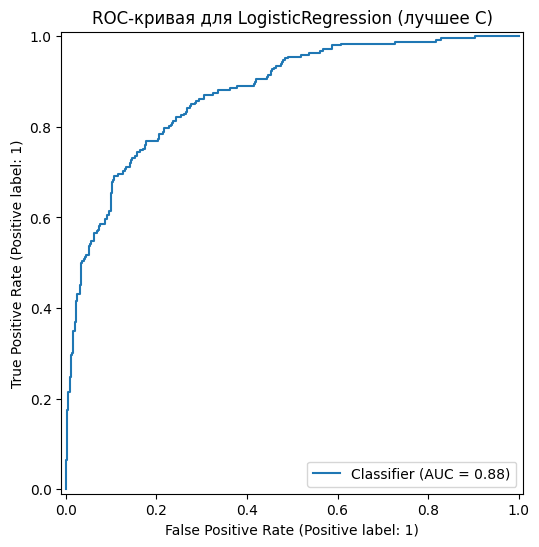

In [157]:
# 3. ROC-кривая и сохранение графика

from sklearn.metrics import RocCurveDisplay
import os

os.makedirs("figures", exist_ok=True)

fig, ax = plt.subplots(figsize=(6, 6))
RocCurveDisplay.from_predictions(
    y_test,
    y_test_proba,
    ax=ax,
)
ax.set_title("ROC-кривая для LogisticRegression (лучшее C)")

plt.savefig('figures/roc_logreg.png', dpi=300, bbox_inches='tight')
plt.show()

In [158]:
results_df = pd.DataFrame.from_dict(
    {
        "Dummy (most_frequent)": {
            "accuracy_test": dummy_test_acc,
            "roc_auc_test": dummy_test_roc_auc,
        },
        "LogReg (best C)": {
            "accuracy_test": test_acc,
            "roc_auc_test": test_roc_auc,
            "C": best_C,
        },
    },
    orient="index",
)

results_df

,accuracy_test,roc_auc_test,C
Dummy (most_frequent),0.590000,0.500000,NaN
LogReg (best C),0.806667,0.875442,0.01


В качестве бейзлайна была использована модель `DummyClassifier` со стратегией `most_frequent`, которая всегда предсказывает самый частый класс и игнорирует признаки. На тестовой выборке она показала `accuracy` около `0.59` и `ROC-AUC` ровно `0.50`, то есть по сути работает как случайный классификатор, использующий только дисбаланс классов. Логистическая регрессия в виде `Pipeline` со стандартизацией признаков и подобранным параметром регуляризации `C = 0`.01 дала на тесте `accuracy` примерно `0.81` и `ROC-AUC` около `0.88`.
​

`Accuracy` выросла с `0.59` у бейзлайна до `0.81` у логистической регрессии, то есть стала примерно на `0.22` больше. `ROC-AUC` увеличился с `0.50` до `0.88`, прирост около `0.38`, что означает заметный прирост качества как по точности, так и по качеству ранжирования вероятностей.


При переборе значений C из множества `[0.01, 0.1, 1.0, 10.0]` было видно, что слишком сильная регуляризация (малые C) ухудшает качество, а при увеличении C качество сначала растёт, а затем перестаёт существенно меняться. В итоге логистическая регрессия с умеренной регуляризацией выглядит разумной моделью для этой задачи: она хорошо используют числовые признаки, заметно превосходит бейзлайн по `accuracy` и `ROC-AU`C и остаётся относительно простой и интерпретируемой, поэтому её можно рекомендовать как базовое решение для прогнозирования дефолта клиентов на данном датасете.